May: Details about coordinates and bathymetry files using the NEMO configuration of the Salish Sea model as an example.

In [1]:
import netCDF4 as nc
import matplotlib.pyplot as plt
from IPython.display import Image, display

import scipy.io as sio

%matplotlib inline

"NEMO has the file names of the coordinates and bathymetry files hard-coded as coordinates.nc and bathy_meter.nc so the files used for a particular run-set need to be copied or symlinked to those names."

http://salishsea-meopar-docs.readthedocs.io/en/latest/code-notes/salishsea-nemo/nemo-forcing/repo.html#repo-contents

### Bathymetry File

In [2]:
bathy_file = nc.Dataset('/ocean/imachuca/NEMO-forcing/grid/bathy_meter_SalishSea.nc')

In [3]:
bathy_file

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF4 data model, file format HDF5):
    Conventions: CF-1.6
    title: Salish Sea NEMO Bathymetry
    institution: Dept of Earth, Ocean & Atmospheric Sciences, University of British Columbia
    source: https://bitbucket.org/salishsea/tools/src/tip/bathymetry/SalishSeaBathy.ipynb
    references: https://bitbucket.org/salishsea/nemo-forcing/src/tip/grid/bathy_meter_SalishSea.nc
    comment: Based on 1_bathymetry_seagrid_WestCoast.nc file from 2-Oct-2013 WCSD_PREP tarball provided by J-P Paquin.
    history: 
    [2013-10-30 13:18] Created netCDF4 zlib=True dataset.
    [2013-10-30 15:22] Set depths between 0 and 4m to 4m and those >428m to 428m.
    [2013-10-31 17:10] Algorithmic smoothing.
    [2013-11-21 19:53] Reverted to pre-smothing dataset (repo rev 3b301b5b9b6d).
    [2013-11-21 20:14] Updated dataset and variable attributes to CF-1.6 conventions & project standards.
    [2013-11-21 20:47] Removed east end of Jervis Inlet and Toba

In [4]:
bathy_file.dimensions

OrderedDict([('y',
              <class 'netCDF4._netCDF4.Dimension'>: name = 'y', size = 898),
             ('x',
              <class 'netCDF4._netCDF4.Dimension'>: name = 'x', size = 398)])

In [5]:
bathy_file.variables

OrderedDict([('nav_lon', <class 'netCDF4._netCDF4.Variable'>
              float64 nav_lon(y, x)
                  units: degrees east
                  valid_range: [-126.40029144 -121.31835175]
                  long_name: Longitude
              unlimited dimensions: 
              current shape = (898, 398)
              filling on, default _FillValue of 9.969209968386869e+36 used),
             ('nav_lat', <class 'netCDF4._netCDF4.Variable'>
              float64 nav_lat(y, x)
                  units: degrees north
                  valid_range: [ 46.85966492  51.10480118]
                  long_name: Latitude
              unlimited dimensions: 
              current shape = (898, 398)
              filling on, default _FillValue of 9.969209968386869e+36 used),
             ('Bathymetry', <class 'netCDF4._netCDF4.Variable'>
              float64 Bathymetry(y, x)
                  _FillValue: 0.0
                  least_significant_digit: 1
                  units: m
             

### Coordinates File

In [15]:
coord_file = nc.Dataset('/ocean/imachuca/NEMO-forcing/grid/coordinates_seagrid_SalishSea.nc')

In [16]:
coord_file

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF3_CLASSIC data model, file format NETCDF3):
    dimensions(sizes): x(398), y(898), time(1)
    variables(dimensions): float32 nav_lon(y,x), float32 nav_lat(y,x), float32 time(time), int32 time_steps(time), float64 glamt(time,y,x), float64 glamu(time,y,x), float64 glamv(time,y,x), float64 glamf(time,y,x), float64 gphit(time,y,x), float64 gphiu(time,y,x), float64 gphiv(time,y,x), float64 gphif(time,y,x), float64 e1t(time,y,x), float64 e1u(time,y,x), float64 e1v(time,y,x), float64 e1f(time,y,x), float64 e2t(time,y,x), float64 e2u(time,y,x), float64 e2v(time,y,x), float64 e2f(time,y,x)
    groups: 

In [7]:
coord_file.variables

OrderedDict([('nav_lon', <class 'netCDF4._netCDF4.Variable'>
              float32 nav_lon(y, x)
                  units: degrees_east
                  comment: at t points
              unlimited dimensions: 
              current shape = (898, 398)
              filling off), ('nav_lat', <class 'netCDF4._netCDF4.Variable'>
              float32 nav_lat(y, x)
                  units: degrees_north
                  comment: at t points
              unlimited dimensions: 
              current shape = (898, 398)
              filling off), ('time', <class 'netCDF4._netCDF4.Variable'>
              float32 time(time)
                  units: seconds since 0001-01-01 00:00:00
                  time_origin: 0000-JAN-01 00:00:00
                  calendar: gregorian
              unlimited dimensions: time
              current shape = (1,)
              filling off), ('time_steps', <class 'netCDF4._netCDF4.Variable'>
              int32 time_steps(time)
                  units: seconds 

**glam** - longitude and **gphi** - latitude

In [8]:
all_vars = ['nav_lon','nav_lat']

for var in all_vars:
    print(coord_file.variables[var])

<class 'netCDF4._netCDF4.Variable'>
float32 nav_lon(y, x)
    units: degrees_east
    comment: at t points
unlimited dimensions: 
current shape = (898, 398)
filling off

<class 'netCDF4._netCDF4.Variable'>
float32 nav_lat(y, x)
    units: degrees_north
    comment: at t points
unlimited dimensions: 
current shape = (898, 398)
filling off



### Scaling factors

These must be calculated and put into the coordinates.nc file.

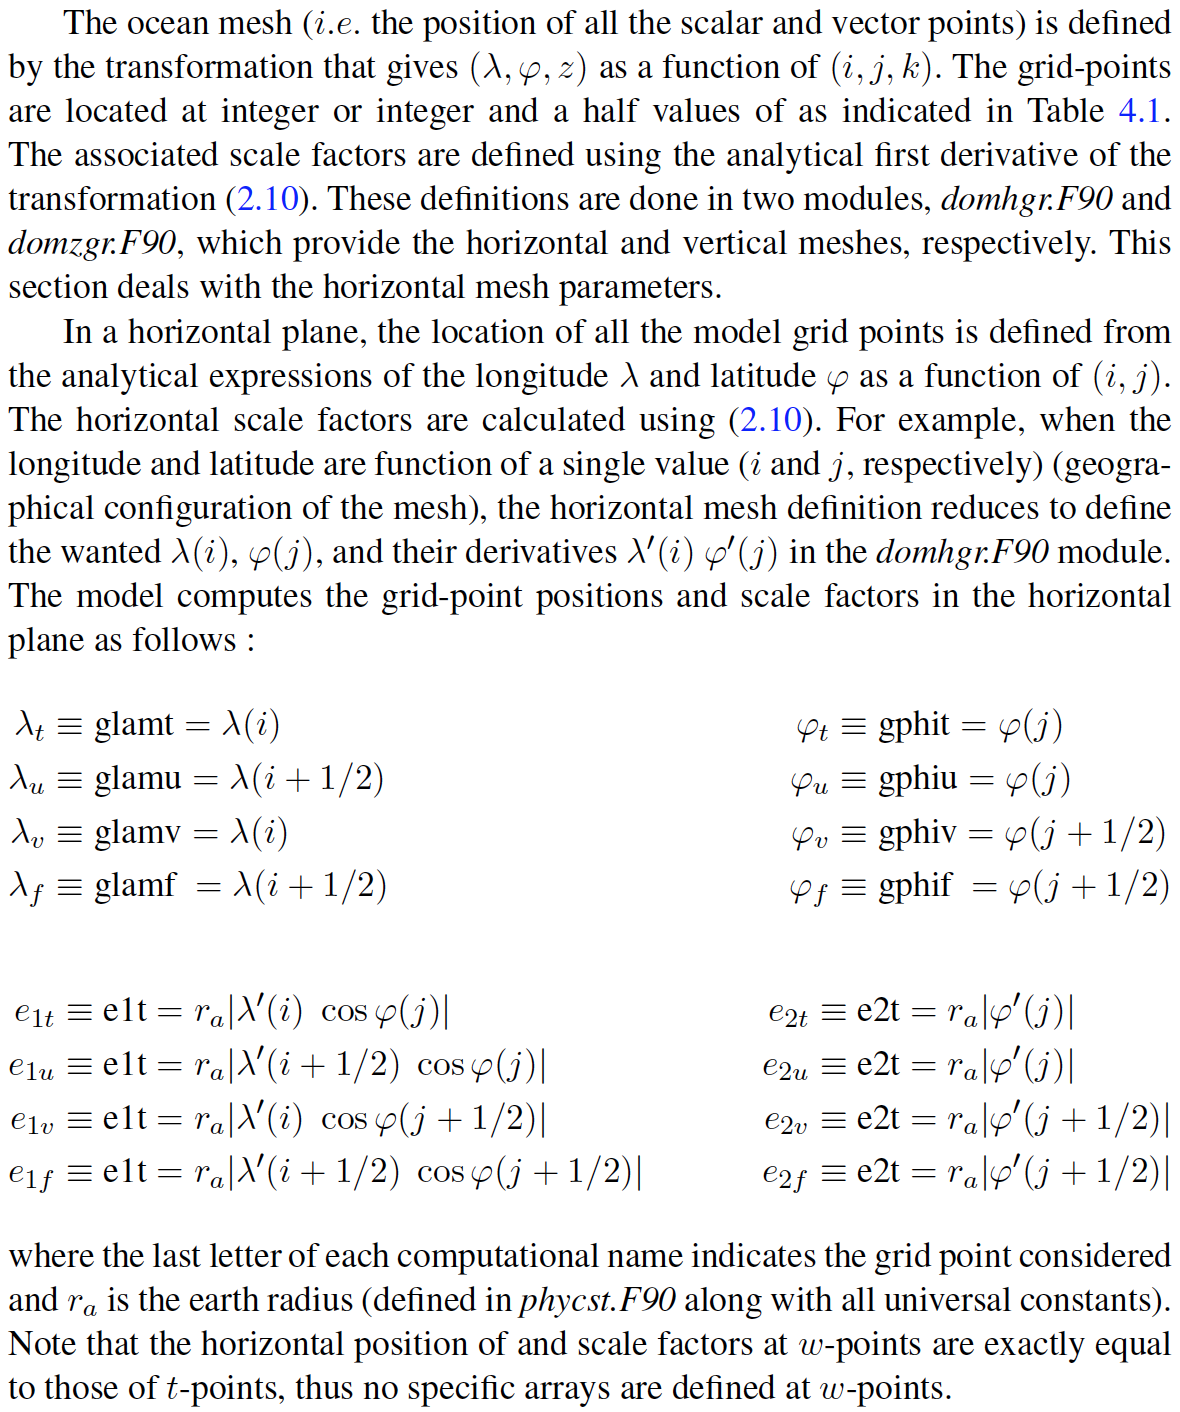

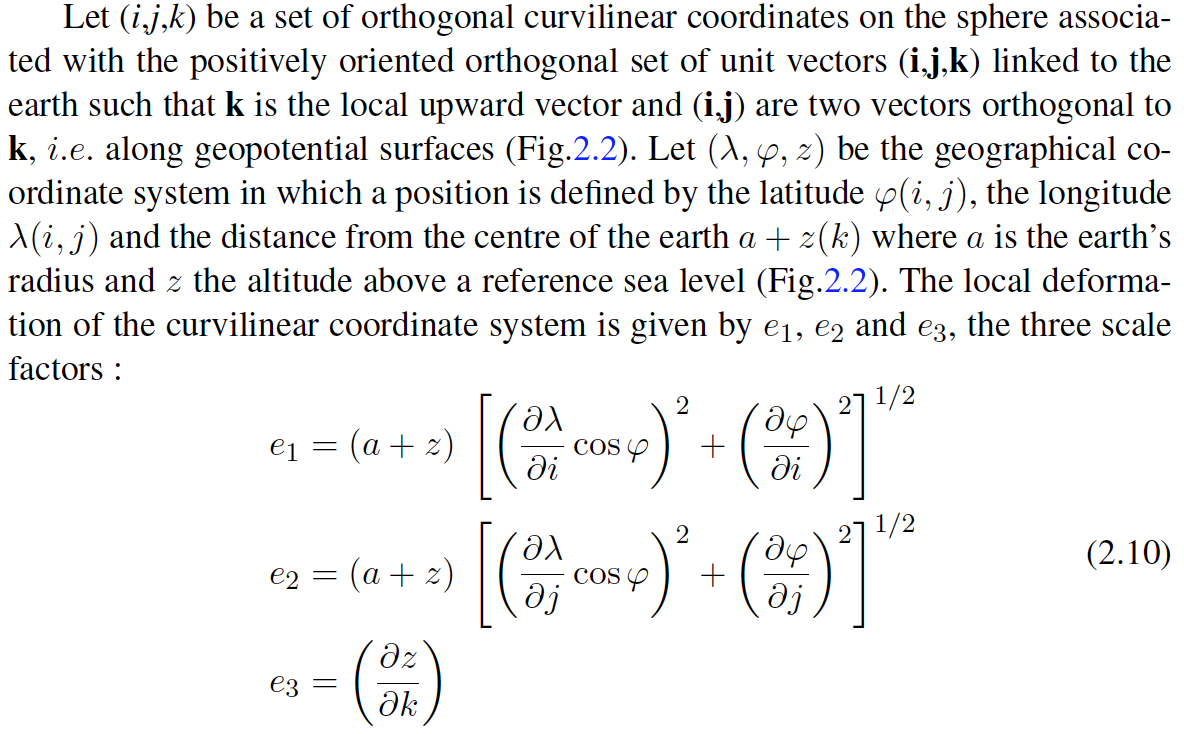

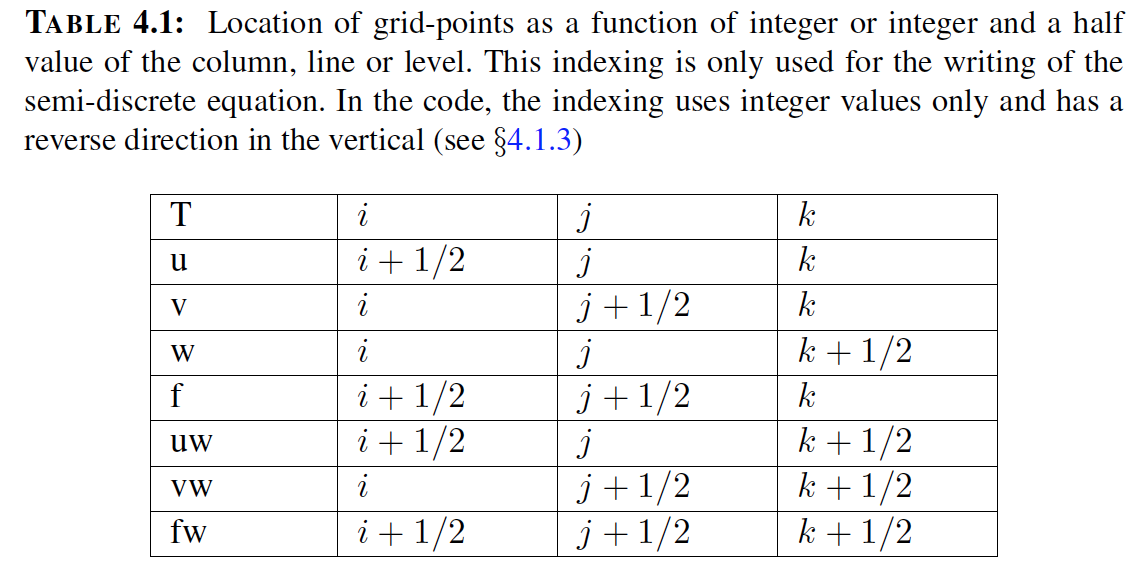

In [17]:
listOfImageNames = ['../../images/coords1.png','../../images/coords2.png','../../images/coords3.png']
# NEMO Ocean Engine by Gurvan Madec and the NEMO team -- pg.54, pg.20, pg.50
for imageName in listOfImageNames:
    display(Image(filename=imageName, width=500))

### Matlab code that calculates scaling factors given a grid.

In [ ]:
% NAME: compute_grid_and_scaling_factors.m
%
% AUTHOR: J.-P. Paquin 
%
% DATE: July 2013
%
% REVISIONS: 
%
% DESCRIPTION: Creates a coordinates.nc file for NEMO from outputs of the 
%              seagrid package (WHOI) available at 
%                 http://woodshole.er.usgs.gov/operations/modeling/seagrid/
%              Computes the latitudes and longitudes of u, v, and f grids
%              as simple averages 
%              and their respective scaling factors (based on ROMS code)
%
% HYPOTHESES:  Seagrid output file has been generated
%
% INPUTS: Seagrid output file 
%
% OUTPUT: Coordinates.nc file in compatible format for NEMO
%
% CALLED PGM & SCRIPTS: earthdist.m : compute distances
%
% NOTES: The final grid size is 2 grid points less in each direction to
%        avoid NaNs to be present in teh scaling factors. 
%
%--------------------------------------------------------------------------
clear all
display('***** compute_grid_and_scaling_factors.m *****')

addpath /users/staff/jppaquin/matlab/mexnc
addpath /users/staff/jppaquin/matlab/netcdf_toolbox/netcdf
addpath /users/staff/jppaquin/matlab/netcdf_toolbox/netcdf/nctype
addpath /users/staff/jppaquin/matlab/netcdf_toolbox/netcdf/ncutility

addpath ../seagrid

path_seagrid='/users/staff/jppaquin/NEMO_PREPARATION/1_Seagrid_generator';

%- Infile
file_seagrid='grid_mat/seagrid_west_coast_1km_900x400_rot_new.mat';
%file_seagrid='grid_mat/seagrid_west_coast_100x100_testAnchor.mat';

%- Outfile
fileout=([path_seagrid '/scaling_factors/coordinates_seagrid_WestCoast.nc']);


%--- LOAD SEAGRID FILE 
load([path_seagrid '/' file_seagrid])
lon_T=s.geographic_grids{1,1}(:,:);
lat_T=s.geographic_grids{1,2}(:,:);

[dimx,dimy]=size(lon_T);

%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
%%%%%           COMPUTE LAT/LON FOR THE U, V AND f GRIDS                    %%%%%
%
% Arakawa-C grid
%
%           f---v---f---v---f  
%           |       |       |
%           u   T   u   T   u
%           |       |       |
%           f---v---f---v---f
%
%
% We define the latitudes longitudes in the output of seagrid to be the
% location of the T grid. Therefore the location of the u grid is defined
% as:
%       lat_u(i,j) = 0.5 * ( lat_T(i,j) + lat_T(i+1,j) )
%       lon_u(i,j) = 0.5 * ( lon_T(i,j) + lon_T(i+1,j) ) 
%
% similarly for the v grid
%       lat_v(i,j) = 0.5 * ( lat_T(i,j) + lat_T(i,j+1) )
%       lon_v(i,j) = 0.5 * ( lon_T(i,j) + lon_T(i,j+1) ) 
%
% and for the f grid:
%       lat_f(i,j) = 0.5 * ( lat_u(i,j) + lat_u(i,j+1) )
%       lon_f(i,j) = 0.5 * ( lon_v(i,j) + lon_v(i+1,j) ) 
%

lat_u=NaN(dimx,dimy)    ;   lon_u=NaN(dimx,dimy);
lat_v=NaN(dimx,dimy)    ;   lon_v=NaN(dimx,dimy);
lat_f=NaN(dimx,dimy)    ;   lon_f=NaN(dimx,dimy);

display('Compute u, v points')
for jj=1:dimy-1
for ii=1:dimx-1

   lat_u(ii,jj) = 0.5 * ( lat_T(ii,jj) + lat_T(ii+1,jj) ) ;
   lon_u(ii,jj) = 0.5 * ( lon_T(ii,jj) + lon_T(ii+1,jj) ) ;

   lat_v(ii,jj) = 0.5 * ( lat_T(ii,jj) + lat_T(ii,jj+1) ) ;
   lon_v(ii,jj) = 0.5 * ( lon_T(ii,jj) + lon_T(ii,jj+1) ) ;

end
end

display('Compute f points')
for jj=1:dimy-1
for ii=1:dimx-1
   lat_f(ii,jj) = 0.5 * ( lat_u(ii,jj) + lat_u(ii  ,jj+1) ) ;
   lon_f(ii,jj) = 0.5 * ( lon_v(ii,jj) + lon_v(ii+1,jj  ) ) ;  
end
end

% construire un tableau contenant toutes les lat-lons
display('Put all lats/lons in 3D array')
lats=NaN(dimx,dimy,4);
lons=NaN(dimx,dimy,4);
for vv=1:4 % T,u,v,f in that order
  switch vv
      case 1 
        lats(:,:,vv)=lat_T(:,:);
        lons(:,:,vv)=lon_T(:,:);
      case 2
        lats(:,:,vv)=lat_u(:,:);
        lons(:,:,vv)=lon_u(:,:);        
      case 3
        lats(:,:,vv)=lat_v(:,:);
        lons(:,:,vv)=lon_v(:,:);
      case 4 
        lats(:,:,vv)=lat_f(:,:);
        lons(:,:,vv)=lon_f(:,:);
  end
end
%clear lat_u lon_u lat_v lon_v lat_f lon_f 



%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
%%%%%       COMPUTE THE SCALING FACTORS FOR T, u, v and f                   %%%%%
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
display('Compute distances between point for each grid... T,u,v,f')
%  earthdist -- Distance in meters between two lon/lats.
%    earthdist(alon, aloat, blon, blat, radius) returns the
%    distance in meters between locations (alon, alat)
%    and (blon, blat).  The default earth radius is
%    assumed to be 6371*1000 meters, the radius for
%    a sphere of equal-volume.
radius = 6371*1000;

dist_lat=NaN(dimx,dimy,4);
dist_lon=NaN(dimx,dimy,4);
for vv=1:4 % T,u,v,f
for jj=1:dimy-1
for ii=1:dimx-1   
  % distance in lat  
  alat=lats(ii  ,jj  ,vv) ;
  alon=lons(ii  ,jj  ,vv) ;
  
  blat=lats(ii+1,jj,vv) ;
  blon=lons(ii+1,jj,vv) ;
  dist_lat(ii,jj,vv) = earthdist(alon, alat, blon, blat, radius); % eq to gy

  % distance in lon
  blat=lats(ii  ,jj+1,vv) ; 
  blon=lons(ii  ,jj+1,vv) ;
  dist_lon(ii,jj,vv) = earthdist(alon, alat, blon, blat, radius); % eq to gx

end
end
end



display('Compute scaling factors (inspired by seagrid2roms.m)')
sx=NaN(dimx,dimy,4);
sy=NaN(dimx,dimy,4);
for vv=1:4 % T,u,v,f
  sx(1:dimx-1,1:dimy  ,vv) = 0.5*(dist_lon(1:end-1,   :   ,vv) + dist_lon(2:end,   :  ,vv));
  sy(1:dimx  ,1:dimy-1,vv) = 0.5*(dist_lat(   :   ,1:end-1,vv) + dist_lat(  :  , 2:end,vv));
end
% sx and sy cannot be Inf, even if on land, so if values
% are Inf, set to an arbitrary non-zero value
sx(isinf(sx))=1.e+20;
sy(isinf(sy))=1.e+20;
sx(isnan(sx))=1.e+20;
sy(isnan(sy))=1.e+20;
  
  
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
%%%%%                     Write coordinates file NC file                    %%%%%
f=netcdf(fileout,'clobber');

xx = length(1:dimx-3) ;
yy = length(1:dimy-3) ;

f('x')=xx;
f('y')=yy;
f('time')='UNLIMITED';

f{'nav_lon'}=ncfloat('y','x');
f{'nav_lon'}.units='degrees_east';
f{'nav_lon'}.comment='at t points';

f{'nav_lat'}=ncfloat('y','x');
f{'nav_lat'}.units='degrees_north';
f{'nav_lat'}.comment='at t points';

f{'time'}=ncfloat('time');
f{'time'}.units='seconds since 0001-01-01 00:00:00';
f{'time'}.time_origin='0000-JAN-01 00:00:00';
f{'time'}.calendar='gregorian';

f{'time_steps'}=ncint('time');
f{'time_steps'}.units='seconds since 0001-01-01 00:00:00';
f{'time_steps'}.time_origin='0000-JAN-01 00:00:00';

f{'glamt'}=ncdouble('time', 'y', 'x');
f{'glamt'}.missing_value= 1.e+20;

f{'glamu'}=ncdouble('time', 'y', 'x');
f{'glamu'}.missing_value= 1.e+20;

f{'glamv'}=ncdouble('time', 'y', 'x');
f{'glamv'}.missing_value= 1.e+20;

f{'glamf'}=ncdouble('time', 'y', 'x');
f{'glamf'}.missing_value= 1.e+20;

f{'gphit'}=ncdouble('time', 'y', 'x');
f{'gphit'}.missing_value= 1.e+20;

f{'gphiu'}=ncdouble('time', 'y', 'x');
f{'gphiu'}.missing_value= 1.e+20;

f{'gphiv'}=ncdouble('time', 'y', 'x');
f{'gphiv'}.missing_value= 1.e+20;

f{'gphif'}=ncdouble('time', 'y', 'x');
f{'gphif'}.missing_value= 1.e+20;

f{'e1t'}=ncdouble('time', 'y', 'x');
f{'e1t'}.missing_value= 1.e+20;

f{'e1u'}=ncdouble('time', 'y', 'x');
f{'e1u'}.missing_value= 1.e+20;

f{'e1v'}=ncdouble('time', 'y', 'x');
f{'e1v'}.missing_value= 1.e+20;

f{'e1f'}=ncdouble('time', 'y', 'x');
f{'e1f'}.missing_value= 1.e+20;

f{'e2t'}=ncdouble('time', 'y', 'x');
f{'e2t'}.missing_value= 1.e+20;

f{'e2u'}=ncdouble('time', 'y', 'x');
f{'e2u'}.missing_value= 1.e+20;

f{'e2v'}=ncdouble('time', 'y', 'x');
f{'e2v'}.missing_value= 1.e+20;

f{'e2f'}=ncdouble('time', 'y', 'x');
f{'e2f'}.missing_value= 1.e+20;

f{'nav_lon'}(:) = permute(lons(1:dimx-3,1:dimy-3,1),[2,1]);
f{'nav_lat'}(:) = permute(lats(1:dimx-3,1:dimy-3,1),[2,1]);

f{'time'}(1:1)=0;
f{'time_step'}(1:1)= 0;

f{'glamt'}(1:1,:,:)= permute(lons(1:dimx-3,1:dimy-3,1)  ,[2,1]);
f{'glamu'}(1:1,:,:)= permute(lons(1:dimx-3,1:dimy-3,2)  ,[2,1]);
f{'glamv'}(1:1,:,:)= permute(lons(1:dimx-3,1:dimy-3,3)  ,[2,1]);
f{'glamf'}(1:1,:,:)= permute(lons(1:dimx-3,1:dimy-3,4)  ,[2,1]);
f{'gphit'}(1:1,:,:)= permute(lats(1:dimx-3,1:dimy-3,1)  ,[2,1]);
f{'gphiu'}(1:1,:,:)= permute(lats(1:dimx-3,1:dimy-3,2)  ,[2,1]);
f{'gphiv'}(1:1,:,:)= permute(lats(1:dimx-3,1:dimy-3,3)  ,[2,1]);
f{'gphif'}(1:1,:,:)= permute(lats(1:dimx-3,1:dimy-3,4)  ,[2,1]);
f{'e1t'}(1:1,:,:)= permute(dist_lon(1:dimx-3,1:dimy-3,1),[2,1]); 
f{'e1u'}(1:1,:,:)= permute(dist_lon(1:dimx-3,1:dimy-3,2),[2,1]);
f{'e1v'}(1:1,:,:)= permute(dist_lon(1:dimx-3,1:dimy-3,3),[2,1]);
f{'e1f'}(1:1,:,:)= permute(dist_lon(1:dimx-3,1:dimy-3,4),[2,1]);
f{'e2t'}(1:1,:,:)= permute(dist_lat(1:dimx-3,1:dimy-3,1),[2,1]);
f{'e2u'}(1:1,:,:)= permute(dist_lat(1:dimx-3,1:dimy-3,2),[2,1]);
f{'e2v'}(1:1,:,:)= permute(dist_lat(1:dimx-3,1:dimy-3,3),[2,1]);
f{'e2f'}(1:1,:,:)= permute(dist_lat(1:dimx-3,1:dimy-3,4),[2,1]);

close(f)
display('  END WRITING COORDINATES')




%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
%%%%%  ORIGINAL CODE from seagrid2roms.m taht computes the scaling %%%%%
%%%%%  required for ROMSfactors                                    %%%%%
% % Use "geometry" from seagrid file for computation of "pm", "pn".
% 
% % "geometry" contains distances computed from lon and lat in the
% % Seagrid routine "dosave.m" using the "earthdist.m" routine, which
% % assumes a spherical globe with a radius of 6371 km.
% 
% gx = geometry{1};   % Spherical distances in meters.
% gy = geometry{2};
% 
% 
% sx = 0.5*(gx(1:end-1, :) + gx(2:end, :));
% sy = 0.5*(gy(:, 1:end-1) + gy(:, 2:end));
% 
% pm = 1 ./ sx;
% pn = 1 ./ sy;
% 
% % pm and pn cannot be Inf, even if on land, so if values
% % are Inf, set to an arbitrary non-zero value
% pm(isinf(pm))=0.999e-3;
% pn(isinf(pn))=0.999e-3;
% pm(isnan(pm))=0.999e-3;
% pn(isnan(pn))=0.999e-3;
% nc{'pm'}(:) = pm;
% nc{'pn'}(:) = pn;
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%

%%%%%%%%%%%%%%%%%%   FUNCTION earthdist.m   %%%%%%%%%%%%%%%%%%%%
% function theResult = earthdist(alon, alat, blon, blat, radius)
% 
% % earthdist -- Distance in meters between two lon/lats.
% %  earthdist(alon, aloat, blon, blat, radius) returns the
% %   distance in maters between locations (alon, alat)
% %   and (blon, blat).  The default earth radius is
% %   assumed to be 6371*1000 meters, the radius for
% %   a sphere of equal-volume.
% 
% if nargin < 4, help(mfilename), return, end
% if nargin < 5, radius = 6371*1000; end   % meters.
% 
% RCF = 180 / pi;
% 
% alon = alon / RCF;
% alat = alat / RCF;
% blon = blon / RCF;
% blat = blat / RCF;
% 
% c = cos(alat);
% ax = c .* cos(alon);
% ay = c .* sin(alon);
% az = sin(alat);
% 
% c = cos(blat);
% bx = c .* cos(blon);
% by = c .* sin(blon);
% bz = sin(blat);
% 
% result = acos(ax.*bx + ay.*by + az.*bz) .* radius;
% 
% if nargout > 0
% 	theResult = result;
% else
% 	disp(result)
% end


### Notes on using SeaGrid for Matlab

#### Overview

* Use the MATLAB function **compute_grid_and_scaling_factors.m** to calculate the scaling factors
        /ocean/dlatorne/MEOPAR/NEMO/NEMO_PREPARATION/1_Seagrid_generator/scaling_factors
* But first, find the domain's coordinates using the **SeaGrid Orthogonal Grid Maker For Matlab** 
        http://woodshole.er.usgs.gov/operations/modeling/seagrid/
* All the SeaGrid files have already been downloaded and stored 
        /ocean/dlatorne/MEOPAR/NEMO/NEMO_PREPARATION/1_Seagrid_generator/seagrid
* The SeaGrid files JP used as input into his MATLAB function have also been stored 
        /ocean/dlatorne/MEOPAR/NEMO/NEMO_PREPARATION/1_Seagrid_generator/grid_mat
___

#### Setup
1. Open MATLAB in the current directory.
2. Add the **.\seagrid**, **.\seagrid\presto** and appropriate **.\seagrid\mex_version_os** directory to your matlab path. Do this by going to *Set Path* and *Add Folder*. I choose *mex_matlab75_linux32*.
3. Test if path works by entering **seagrid version** into the command window.
4. It should say something like Version of 23-Apr-2001 16:26:45.
5. Follow the SeaGrid tutorial in http://woodshole.er.usgs.gov/operations/modeling/seagrid/tutorial.html.

___

#### SeaGrid Summary
1. **seagrid**
2. SeaGrid - Load - **Coastline/Bathymetry File**
3. Define 4 corner points (Starting corner point is defined by  an asterisk)
4. Add any number of edge points (left click and drag to add, right click to remove)
5. View - **Setup** - Okay to increase/decrease number of grid cells (Edge 1 is the first edge counter-clockwise from the starting point)
6. Compute - **Orthogonality** to check grid right angles (colorbar included)
7. View - **Spacers/Spacer Count/Spacer Setup** to modify grid spacing (go back wit View - Control Points)
8. View - Setup - **Projection** for mercator or stereographic and Toggle - Graticule for lon/lat lines
9. SeaGrid - **SaveAs/Revert To Saved** or SeaGrid - Load - **SeaGrid File**
10. Compute - **Land Mask/Depths and Land Mask/Depths/Delete Mask** (and the cells are interactive)
11. The "SeaGrid" file is a Mat-file that contains a "struct" with intuitive fieldnames. It is used by the "seagrid2ecom" and "seagrid2scrum" reformatting programs. Both of those are M-files, which can be used as examples for designing other reformatting routines. *JP based his code on seagrid2roms.m*

*I followed these steps and created a file in the ../grid/ directory called seagrid_amazon.mat*


___

#### Ideas
* Can I load MC bathymetry?
* Do I need a coastlines file? How do I make one? Is the bathy enough?
* Significance of land masking? I think it knows what is land based on sign of depth but tutorial says it depends on coastline.

___

#### seagrid_amazon.mat
```python 
amazon = sio.loadmat('seagrid_amazon.mat')
```

    {'__globals__': [],
     '__header__': b'MATLAB 5.0 MAT-file, Platform: GLNXA64, Created on: Thu Aug 25 16:18:26 2016',
     '__version__': '1.0',
     's': array([[ (['25-Aug-2016 16:18:26'], ['dosave'], ['Mercator'], [[0, 0, 0]], [], [], ['/ocean/dlatorne/MEOPAR/NEMO/NEMO_PREPARATION/1_Seagrid_generator/seagrid/test_data/amazon_bathy.mat'], ['/ocean/dlatorne/MEOPAR/NEMO/NEMO_PREPARATION/1_Seagrid_generator/seagrid/test_data/amazon_coast.mat']

    dtype=[('created_on', 'O'), ('created_by', 'O'), ('projection', 'O'), ('projection_center', 'O'), ('longitude_bounds', 'O'), ('latitude_bounds', 'O'), ('bathymetry', 'O'), ('coastline', 'O'), ('points', 'O'), ('end_slope_flag', 'O'), ('grid_size', 'O'), ('grids', 'O'), ('spacings', 'O'), ('default_spacings', 'O'), ('spaced_edges', 'O'), ('spaced_grids', 'O'), ('geographic_grids', 'O'), ('gridded_bathymetry', 'O'), ('clipping_depths', 'O'), ('bottom', 'O'), ('top', 'O'), ('geometry', 'O'), ('orientation', 'O'), ('mask', 'O'), ('water', 'O'), ('land', 'O')])}

___

#### MATLAB Code Modifications
*I copied earthdist.m and compute_grid_and_scaling_factors.m into the ../grid/ directory.*

Modifications to code:

    path_seagrid='/users/staff/jppaquin/NEMO_PREPARATION/1_Seagrid_generator';

    %- Infile
    file_seagrid='grid_mat/seagrid_west_coast_1km_900x400_rot_new.mat';
    %file_seagrid='grid_mat/seagrid_west_coast_100x100_testAnchor.mat';

    %- Outfile
    fileout=([path_seagrid '/scaling_factors/coordinates_seagrid_WestCoast.nc']);
    
    %--- LOAD SEAGRID FILE 
    load([path_seagrid '/' file_seagrid])
    
was changed to a simple 

    fileout=(['test_coordinates_seagrid_WestCoast.nc'])
    load(['seagrid_west_coast_1km_900x400_rot_new.mat'])

and

    addpath /users/staff/jppaquin/matlab/mexnc
    addpath /users/staff/jppaquin/matlab/netcdf_toolbox/netcdf
    addpath /users/staff/jppaquin/matlab/netcdf_toolbox/netcdf/nctype
    addpath /users/staff/jppaquin/matlab/netcdf_toolbox/netcdf/ncutility
    addpath ../seagrid

*I checked $/.matlab/R2013b and these weren't there. Check if they are readily available and download them. Code runs fine without any of these modules up to the final calculation point before the netcdf file is created.*

    f=netcdf(fileout,'clobber');
    
gives 

    Undefined function 'netcdf' for input arguments of type 'char'.
    
1) I downloaded **mexcdf** with **mexnc** and **snctools** from http://mexcdf.sourceforge.net/downloads/ and saved it in the /grid directory.

**mexnc**: *Add this directory to your MATLAB path, and you are now setup to use mexnc. Check the READMEs for SNCTOOLS for further instructions. Please note that mexnc is NOT the same as the "NetCDF Toolbox", which is something that I did not write and therefore cannot support.*

    addpath /ocean/imachuca/Canyons/mackenzie_canyon/bathymetry/grid/mexcdf_1/mexnc
    
**snctools**: *SNCTOOLS is a set of MATLAB tools primarily for reading and writing classic model netCDF-3 and netCDF-4 files.*

    addpath /ocean/imachuca/Canyons/mackenzie_canyon/bathymetry/grid/mexcdf_1/snctools
    
I didn't include this path because it wasn't needed in the original.

2) Go to https://sourceforge.net/p/mexcdf/svn/48/tree/trunk/netcdf_toolbox/ and click on Download Snapshot. This downloads netcdf toolbox, mexnc, and snctools.

**netcdf_toolbox**: * If you use the NetCDF Toolbox, you will not be able to easily access the help for MATLAB's native netcdf package in R2008b and later.  "help netcdf" will always go to the NetCDF Toolbox, even if it comes last on your path. In order to use the netcdf toolbox, you should add the following paths to your matlab path.*

    addpath /ocean/imachuca/Canyons/mackenzie_canyon/bathymetry/grid/mexcdf_2/netcdf_toolbox/netcdf
    addpath /ocean/imachuca/Canyons/mackenzie_canyon/bathymetry/grid/mexcdf_2/netcdf_toolbox/netcdf/nctype
    addpath /ocean/imachuca/Canyons/mackenzie_canyon/bathymetry/grid/mexcdf_2/netcdf_toolbox/netcdf/ncutility
    
Summary:
* mexcdf_1 has mexnc
* mexcdf_2 has mexnc and netcdf_toolbox
* 1 was downloaded for R2013a
* 2 was uploaded in 2004
* 1 has more files than 2

___

#### Progress

    Undefined function 'finite' for input arguments of type 'double'.

    Error in ncdim (line 70)
    if ~finite(theDimsize), theDimsize = 0; end

    Error in netcdf/subsasgn (line 91)
             result = ncdim(theDimname, other, self);

    Error in compute_grid_and_scaling_factors (line 195)
    f('x')=xx;